<a href="https://colab.research.google.com/github/salahagnir/CA2/blob/main/CA2_Statistics_30_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')


In [3]:
df['Weeks of the year'] = df['Weeks of the year'].str.replace('Week', '')

In [4]:
df.head()

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,05,Number,912795.0


In [5]:
df.describe()

,TLIST(W1),Year,C01198V01436,VALUE
count,795.000000,795.000000,795.000000,7.440000e+02
mean,2021.000000,2021.000000,27.000000,4.326046e+05
std,1.415104,1.415104,15.306688,2.646196e+05
min,2019.000000,2019.000000,1.000000,1.972700e+04
25%,2020.000000,2020.000000,14.000000,2.257425e+05
50%,2021.000000,2021.000000,27.000000,4.148065e+05
75%,2022.000000,2022.000000,40.000000,5.244765e+05
max,2023.000000,2023.000000,53.000000,1.173473e+06


In [6]:
# Calculate mean, median, variance, and standard deviation
mean_value = df['VALUE'].mean()
median_value = df['VALUE'].median()
variance_value = df['VALUE'].var()
std_deviation_value = df['VALUE'].std()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")

Mean: 432604.56720430107
Median: 414806.5
Variance: 70023550346.40732
Standard Deviation: 264619.6333351086


In [7]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATISTIC            0.000000
Statistic Label      0.000000
TLIST(W1)            0.000000
Year                 0.000000
C03132V03784         0.000000
Luas Line            0.000000
C01198V01436         0.000000
Weeks of the year    0.000000
UNIT                 0.000000
VALUE                6.415094
dtype: float64


In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Year                 0
C03132V03784         0
Luas Line            0
C01198V01436         0
Weeks of the year    0
UNIT                 0
VALUE                0
dtype: int64

In [10]:
columns_to_drop = ['STATISTIC','Statistic Label','TLIST(W1)','C03132V03784', 'C01198V01436','UNIT']

In [11]:
df = df.drop(columns=columns_to_drop, axis=1)

In [12]:
# Convert the 'Weeks of the year' column to integer
df['Weeks of the year'] = df['Weeks of the year'].str.extract('(\d+)').astype(int)

# Now, the 'Weeks of the year' column is of integer type
print(df.dtypes)

Year                   int64
Luas Line             object
Weeks of the year      int64
VALUE                float64
dtype: object


In [13]:
df

,Year,Luas Line,Weeks of the year,VALUE
0,2019,All Luas lines,1,549533.0
1,2019,All Luas lines,2,839022.0
2,2019,All Luas lines,3,819359.0
3,2019,All Luas lines,4,860745.0
4,2019,All Luas lines,5,912795.0
...,...,...,...,...
776,2023,Green line,35,411878.0
777,2023,Green line,36,432905.0
778,2023,Green line,37,445474.0
779,2023,Green line,38,498593.0


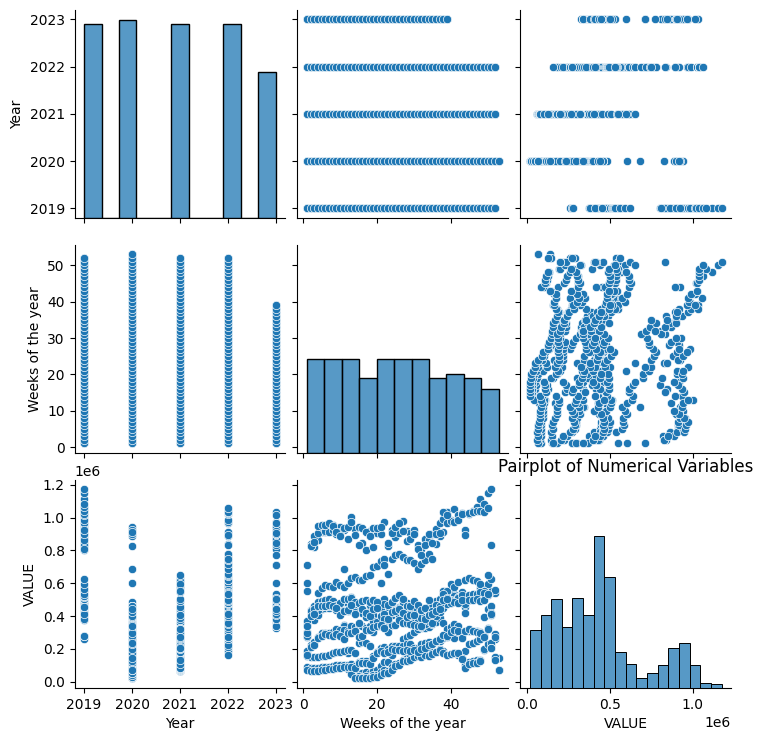

In [14]:
# Pairplot for multivariate analysis
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

The code employs the Seaborn library (sns) to create a grid of scatterplots depicting pairwise relationships among numerical columns in the DataFrame df. This visualization allows for a quick exploration of correlations and distributions between different variables in the dataset.

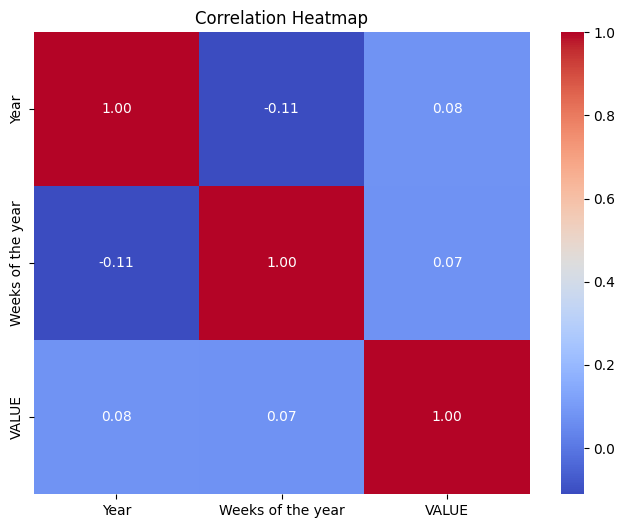

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

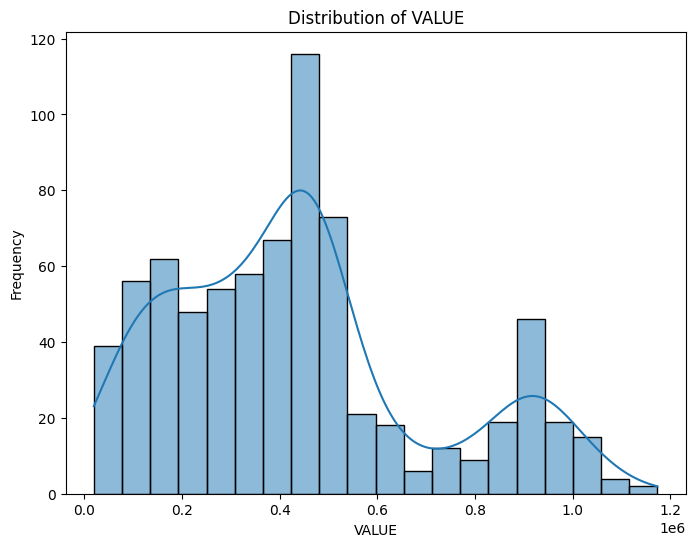

In [16]:
# Histogram to visualize the distribution of 'VALUE'
plt.figure(figsize=(8, 6))
sns.histplot(df['VALUE'], kde=True, bins=20)
plt.title('Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.show()

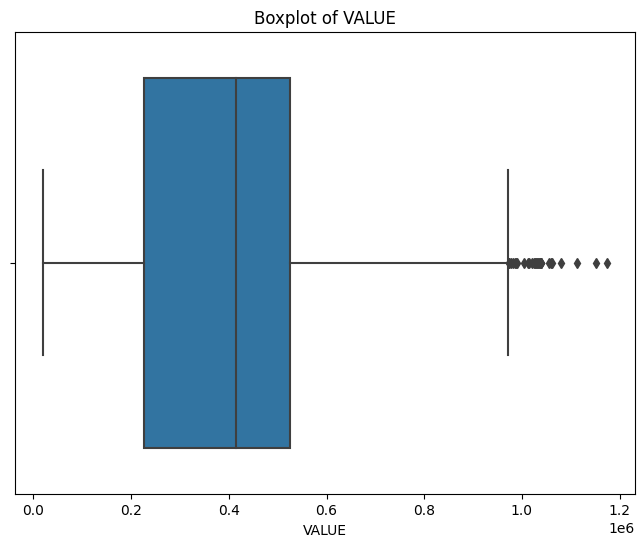

In [17]:
# Boxplot to visualize outliers in 'VALUE'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['VALUE'])
plt.title('Boxplot of VALUE')
plt.xlabel('VALUE')
plt.show()

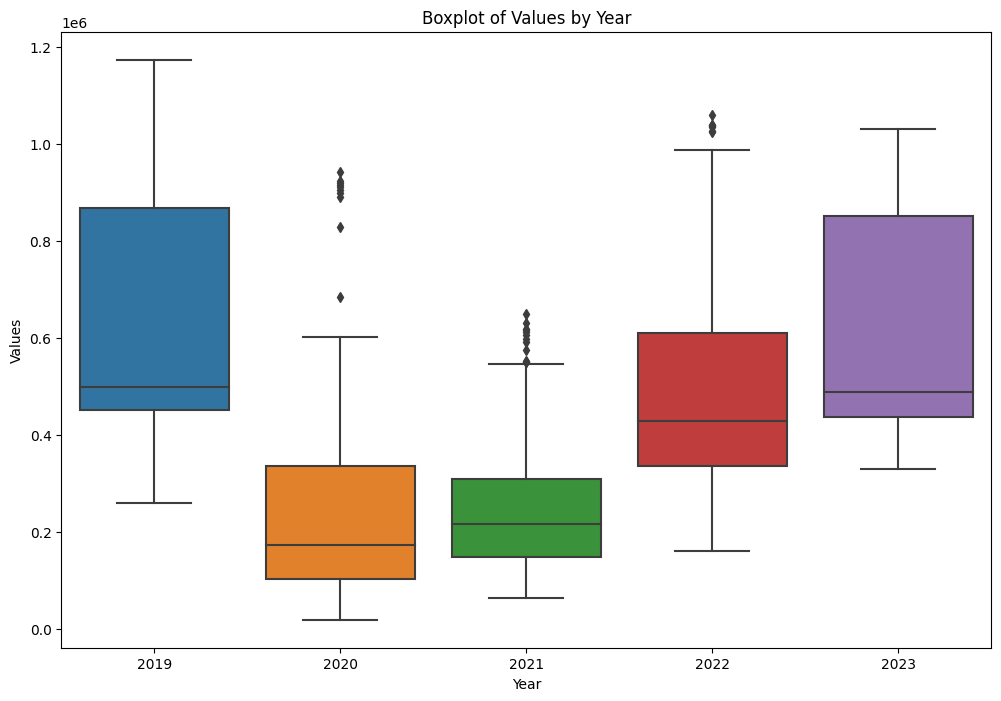

In [18]:
# Boxplot of 'VALUE' by 'Year'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='VALUE', data=df)
plt.title('Boxplot of Values by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

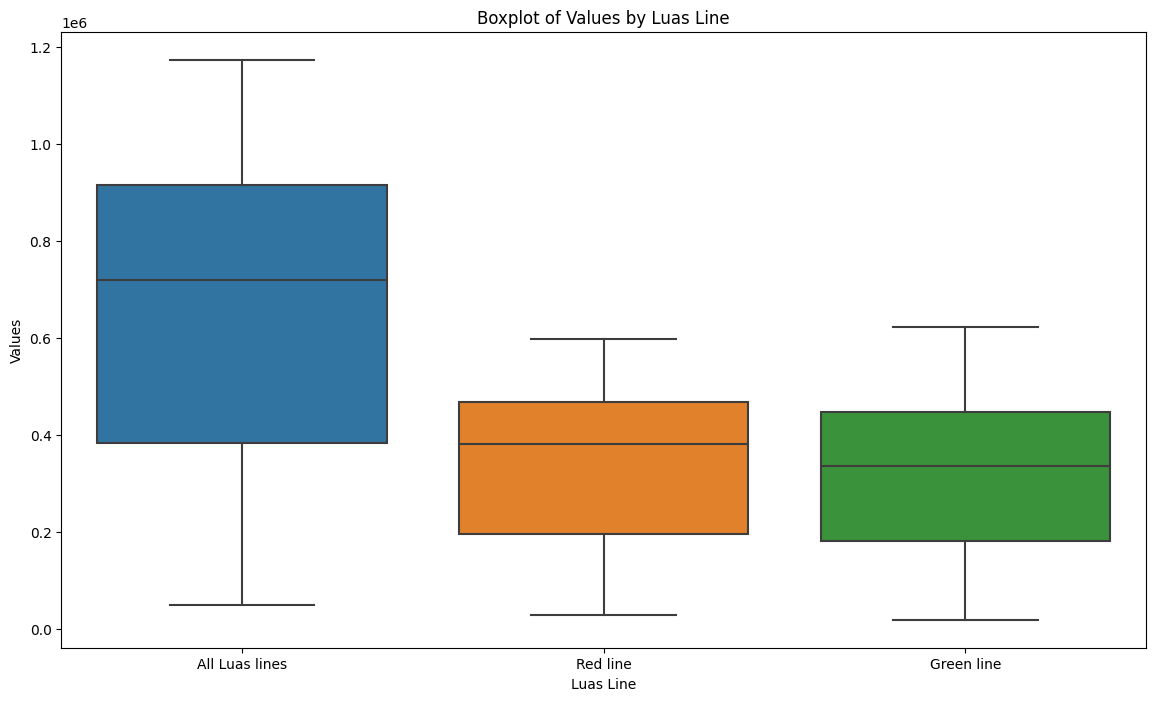

In [19]:
# Boxplot of 'VALUE' by 'Luas Line'
plt.figure(figsize=(14, 8))
sns.boxplot(x='Luas Line', y='VALUE', data=df)
plt.title('Boxplot of Values by Luas Line')
plt.xlabel('Luas Line')
plt.ylabel('Values')
plt.show()

The code generates a boxplot using Seaborn to illustrate how values ('VALUE') are distributed across various categories of 'Luas Line'. This visualization helps compare these distributions, showing key statistical information such as central tendency, spread, and potential outliers for each category.
The 'VALUE' distribution across all Luas lines indicates a majority in the overall line compared to the red and green lines, suggesting similarities in the distributions of these two specific lines


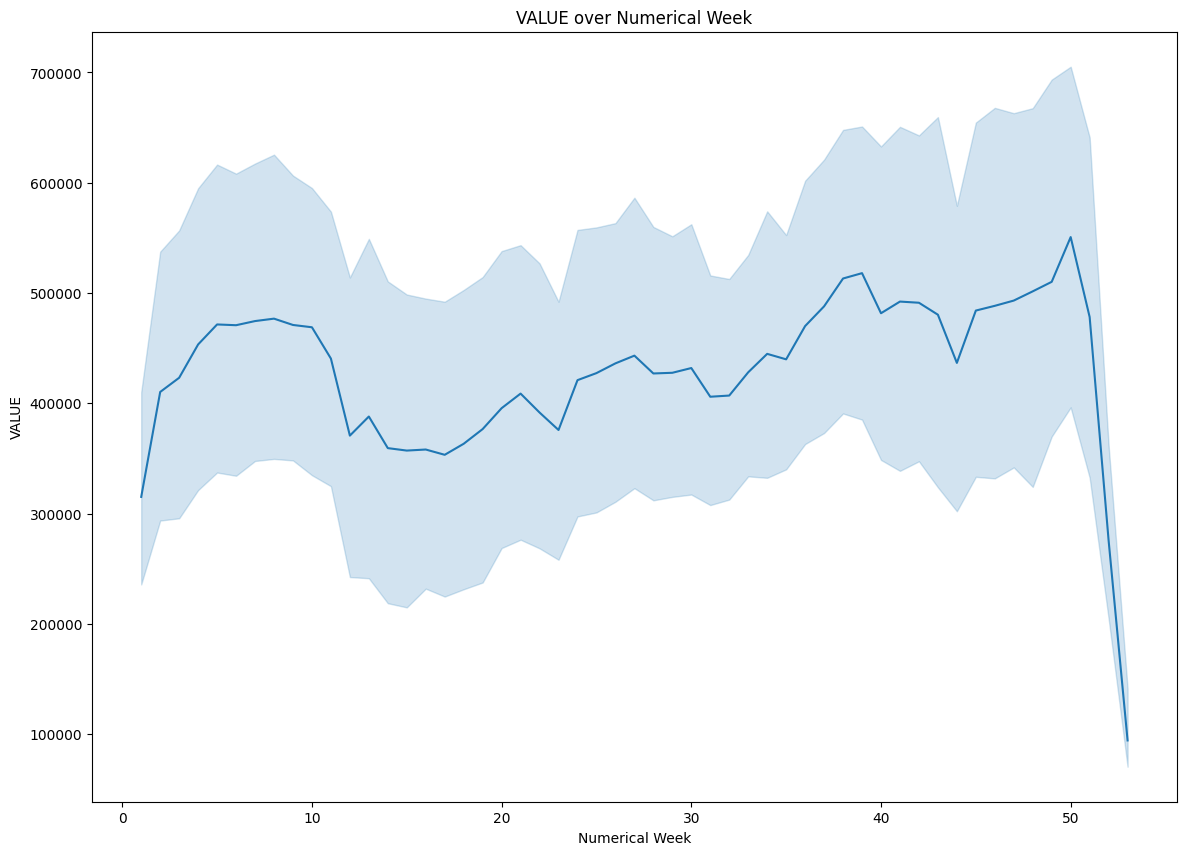

In [20]:
# Line plot to visualize 'VALUE' over 'Weeks of the year'
plt.figure(figsize=(14, 10))
sns.lineplot(x='Weeks of the year', y='VALUE', data=df)
plt.title('VALUE over Numerical Week')
plt.xlabel('Numerical Week')
plt.ylabel('VALUE')
plt.show()

The code creates a line plot using Seaborn to display how 'VALUE' changes over the weeks of the year. This visualization helps illustrate the trend or pattern of 'VALUE' across different numerical weeks, offering insights into its fluctuation or trend over time.


In [21]:
from statsmodels.stats.proportion import proportion_confint

# Group by 'Luas Line	' and calculate the count for each group
num_users_by_transport = df.groupby('Luas Line')['VALUE'].count()

# Calculate the total number of observations
total_users = df['VALUE'].count()

# Calculate the proportion of users for each Luas Line
proportion_users_by_transport = num_users_by_transport / total_users

# Calculate the confidence interval for the proportion of users
conf_interval = proportion_confint(count=num_users_by_transport, nobs=total_users)

print("Number of Users by Transport:")
print(num_users_by_transport)
print("\nTotal Users:", total_users)
print("\nProportion of Users by Transport:")
print(proportion_users_by_transport)
print("\nConfidence Interval for Proportion of Users:")
print(conf_interval)

Number of Users by Transport:
Luas Line
All Luas lines    248
Green line        248
Red line          248
Name: VALUE, dtype: int64

Total Users: 744

Proportion of Users by Transport:
Luas Line
All Luas lines    0.333333
Green line        0.333333
Red line          0.333333
Name: VALUE, dtype: float64

Confidence Interval for Proportion of Users:
(Luas Line
All Luas lines    0.29946
Green line        0.29946
Red line          0.29946
dtype: float64, Luas Line
All Luas lines    0.367206
Green line        0.367206
Red line          0.367206
dtype: float64)


In [22]:
from scipy import stats

In [23]:
# Calculate sample statistics
mean = np.mean(df)
std_dev = np.std(df, ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(df)


In [24]:
# Calculate the 95% confidence interval for the mean
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha / 2, df=sample_size - 1)  # t-critical value


In [25]:
margin_of_error = t_critical * (std_dev / np.sqrt(sample_size))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Mean number of passenger journeys per week:", mean)
print(f"95% Confidence Interval for the mean: {confidence_interval}")

Mean number of passenger journeys per week: Year                   2020.891129
Weeks of the year        25.584677
VALUE                432604.567204
dtype: float64
95% Confidence Interval for the mean: (Year                   2020.792397
Weeks of the year        24.522571
VALUE                413559.096112
dtype: float64, Year                   2020.989861
Weeks of the year        26.646784
VALUE                451650.038296
dtype: float64)


In [26]:
from scipy import stats

# Provided dataset for Ireland passenger journeys
ireland_passenger_journeys = np.array([
    549533.0, 839022.0, 819359.0, 860745.0, 912795.0, 912612.0,
    940476.0, 952291.0, 929391.0, 941919.0, 924998.0, 868205.0,
    1003871.0, 933575.0, 945662.0, 842186.0, 801296.0, 919255.0,
    817933.0, 904983.0
])

In [27]:
    #Spain
    other_country_passenger_journeys = np.array([

        2322849.0, 3761721.0, 2498808, 2559261, 1772593, 4700202, 1335402, 2748082, 3968166, 4528140, 1881581, 1611998, 4123271, 1356666, 2019982, 5283699, 1959851, 5147393, 3998202, 6435060

        ])


In [28]:

# Perform t-test
t_statistic, t_p_value = stats.ttest_ind(ireland_passenger_journeys, other_country_passenger_journeys)

# Perform ANOVA
anova_p_value = stats.f_oneway(ireland_passenger_journeys, other_country_passenger_journeys).pvalue

# Perform Wilcoxon signed-rank test
wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(ireland_passenger_journeys, other_country_passenger_journeys)

# Perform Chi-squared test
observed_values = np.array([ireland_passenger_journeys, other_country_passenger_journeys])
chi2_statistic, chi2_p_value, _, _ = stats.chi2_contingency(observed_values)
# Perform Kruskal-Wallis test
kruskal_statistic, kruskal_p_value = stats.kruskal(ireland_passenger_journeys, other_country_passenger_journeys)

In [29]:
# Print the results
print("Hypotheses:")
print("------------")
print("T-test:")
print("H0: There is no significant difference in the mean number of passenger journeys between Ireland and the other country.")
print("H1: There is a significant difference in the mean number of passenger journeys between Ireland and the other country.")
print(f"T-test: p-value = {t_p_value:.4f}\n")


Hypotheses:
------------
T-test:
H0: There is no significant difference in the mean number of passenger journeys between Ireland and the other country.
H1: There is a significant difference in the mean number of passenger journeys between Ireland and the other country.
T-test: p-value = 0.0000



In [30]:
print("ANOVA:")
print("H0: There is no significant difference in the mean number of passenger journeys among Ireland and the other country.")
print("H1: There is at least one pair of groups (Ireland and the other country) with different mean numbers of passenger journeys.")
print(f"ANOVA: p-value = {anova_p_value:.4f}\n")

ANOVA:
H0: There is no significant difference in the mean number of passenger journeys among Ireland and the other country.
H1: There is at least one pair of groups (Ireland and the other country) with different mean numbers of passenger journeys.
ANOVA: p-value = 0.0000



In [31]:
print("Wilcoxon Signed-Rank Test:")
print("H0: There is no significant difference in the median number of passenger journeys between Ireland and the other country.")
print("H1: There is a significant difference in the median number of passenger journeys between Ireland and the other country.")
print(f"Wilcoxon Signed-Rank Test: p-value = {wilcoxon_p_value:.4f}\n")

Wilcoxon Signed-Rank Test:
H0: There is no significant difference in the median number of passenger journeys between Ireland and the other country.
H1: There is a significant difference in the median number of passenger journeys between Ireland and the other country.
Wilcoxon Signed-Rank Test: p-value = 0.0000



In [32]:
print("Chi-Squared Test:")
print("H0: There is no association between the frequency distribution of passenger journeys (high/low) in Ireland and the other country.")
print("H1: There is an association between the frequency distribution of passenger journeys (high/low) in Ireland and the other country.")
print(f"Chi-Squared Test: p-value = {chi2_p_value:.4f}\n")


Chi-Squared Test:
H0: There is no association between the frequency distribution of passenger journeys (high/low) in Ireland and the other country.
H1: There is an association between the frequency distribution of passenger journeys (high/low) in Ireland and the other country.
Chi-Squared Test: p-value = 0.0000



In [33]:
print("Kruskal-Wallis Test:")
print("H0: There is no difference in the median number of passenger journeys among multiple groups (Ireland and the other country).")
print("H1: There is a difference in the median number of passenger journeys among multiple groups (Ireland and the other country).")
print(f"Kruskal-Wallis Test: p-value = {kruskal_p_value:.4f}\n")

Kruskal-Wallis Test:
H0: There is no difference in the median number of passenger journeys among multiple groups (Ireland and the other country).
H1: There is a difference in the median number of passenger journeys among multiple groups (Ireland and the other country).
Kruskal-Wallis Test: p-value = 0.0000



In [34]:
# Print the results
print(f"T-test: p-value = {t_p_value:.4f}")
print(f"ANOVA: p-value = {anova_p_value:.4f}")
print(f"Wilcoxon Signed-Rank Test: p-value = {wilcoxon_p_value:.4f}")
print(f"Chi-Squared Test: p-value = {chi2_p_value:.4f}")
print(f"Kruskal-Wallis Test: p-value = {kruskal_p_value:.4f}")

T-test: p-value = 0.0000
ANOVA: p-value = 0.0000
Wilcoxon Signed-Rank Test: p-value = 0.0000
Chi-Squared Test: p-value = 0.0000
Kruskal-Wallis Test: p-value = 0.0000


In [35]:

from scipy.stats import ttest_ind, f_oneway, wilcoxon, chi2_contingency, kruskal

# Generating random data for two groups (with no significant difference)
np.random.seed(45)
group1 = np.random.normal(loc=0, scale=1, size=100)
group2 = np.random.normal(loc=0.2, scale=1, size=100)

# Performing statistical tests
t_statistic, t_p_value = ttest_ind(group1, group2)
anova_statistic, anova_p_value = f_oneway(group1, group2)
wilcoxon_statistic, wilcoxon_p_value = wilcoxon(group1, group2)

# Creating a contingency table for Chi-Squared Test (no significant difference)
observed = np.array([[50, 50], [50, 50]])
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(observed)

kruskal_statistic, kruskal_p_value = kruskal(group1, group2)

# Set significance level
alpha = 0.05

# T-test
if t_p_value < alpha:
    print("T-test: Reject the null hypothesis")
else:
    print("T-test: Fail to reject the null hypothesis")

# ANOVA
if anova_p_value < alpha:
    print("ANOVA: Reject the null hypothesis")
else:
    print("ANOVA: Fail to reject the null hypothesis")

# Wilcoxon Signed-Rank Test
if wilcoxon_p_value < alpha:
    print("Wilcoxon Signed-Rank Test: Reject the null hypothesis")
else:
    print("Wilcoxon Signed-Rank Test: Fail to reject the null hypothesis")

# Chi-Squared Test
if chi2_p_value < alpha:
    print("Chi-Squared Test: Reject the null hypothesis")
else:
    print("Chi-Squared Test: Fail to reject the null hypothesis")

# Kruskal-Wallis Test
if kruskal_p_value < alpha:
    print("Kruskal-Wallis Test: Reject the null hypothesis")
else:
    print("Kruskal-Wallis Test: Fail to reject the null hypothesis")

T-test: Reject the null hypothesis
ANOVA: Reject the null hypothesis
Wilcoxon Signed-Rank Test: Reject the null hypothesis
Chi-Squared Test: Fail to reject the null hypothesis
Kruskal-Wallis Test: Reject the null hypothesis


In [36]:
df2 = pd.read_csv('/content/drive/MyDrive/CA2/Spain.csv')

In [37]:
df2

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2503450,2524650,2591273,2505594,2122331,2322849,1155445,1350331,659666
1,2,2,PLAZA DE MANUEL BECERRA - AVENIDA REINA VICTORIA,3764122,3776352,3961191,3757125,3243683,3761721,1751521,2188010,1131774
2,3,3,PUERTA DE TOLEDO - PLAZA DE SAN AMARO,3065657,3020582,3426712,3044709,2711451,2498808,1366097,1668801,783687
3,4,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2457707,2419891,2499953,2485655,2509467,2559261,1404590,1727608,874014
4,5,5,PUERTA DEL SOL/SEVILLA - ESTACION DE CHAMARTIN,1974948,1964634,2069648,1924061,1798507,1772593,890114,1142059,618605
...,...,...,...,...,...,...,...,...,...,...,...,...
264,788,SE,ATOCHA RENFE - RECOLETOS,0,0,200494,0,0,0,0,0,0
265,796,SE,METROPOLITANO - MONCLOA,515186,0,0,0,0,0,0,0,0
266,797,SE,ALAMEDA DE OSUNA - TORRE ARIAS,106541,0,0,0,0,0,0,0,0
267,798,SE,METROPOLITANO-CIUDAD UNIVERSITARIA - MONCLOA,73280,0,0,0,0,0,0,0,0


In [38]:
df2.isnull().sum()


Código          0
Etiqueta        0
Denominación    0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
dtype: int64

In [39]:
df1 = pd.DataFrame(df2)

# Melt the DataFrame
df1_melted = pd.melt(df1, id_vars=['Código', 'Etiqueta', 'Denominación'],
                     var_name='Year', value_name='VALUE')

# Extract the year from the 'Year' column
df1_melted['Year'] = df1_melted['Year'].str.extract('(\d+)', expand=False)

# Display the melted DataFrame
print("Melted DataFrame:")
print(df1_melted)

# Display the original DataFrame
#print("\nOriginal DataFrame:")
print(df1)


Melted DataFrame:
      Código Etiqueta                                      Denominación  Year  \
0          1        1                 PLAZA DE CRISTO REY - PROSPERIDAD  2014   
1          2        2  PLAZA DE MANUEL BECERRA - AVENIDA REINA VICTORIA  2014   
2          3        3             PUERTA DE TOLEDO - PLAZA DE SAN AMARO  2014   
3          4        4        PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA  2014   
4          5        5    PUERTA DEL SOL/SEVILLA - ESTACION DE CHAMARTIN  2014   
...      ...      ...                                               ...   ...   
2416     788       SE                          ATOCHA RENFE - RECOLETOS  2022   
2417     796       SE                           METROPOLITANO - MONCLOA  2022   
2418     797       SE                    ALAMEDA DE OSUNA - TORRE ARIAS  2022   
2419     798       SE      METROPOLITANO-CIUDAD UNIVERSITARIA - MONCLOA  2022   
2420     799       SE                       MAR DE CRISTAL - VALDEBEBAS  2022   

        V

In [40]:
df2 = (df1_melted)
df2

,Código,Etiqueta,Denominación,Year,VALUE
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2014,2503450
1,2,2,PLAZA DE MANUEL BECERRA - AVENIDA REINA VICTORIA,2014,3764122
2,3,3,PUERTA DE TOLEDO - PLAZA DE SAN AMARO,2014,3065657
3,4,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2014,2457707
4,5,5,PUERTA DEL SOL/SEVILLA - ESTACION DE CHAMARTIN,2014,1974948
...,...,...,...,...,...
2416,788,SE,ATOCHA RENFE - RECOLETOS,2022,0
2417,796,SE,METROPOLITANO - MONCLOA,2022,0
2418,797,SE,ALAMEDA DE OSUNA - TORRE ARIAS,2022,0
2419,798,SE,METROPOLITANO-CIUDAD UNIVERSITARIA - MONCLOA,2022,0


T-Test

In [41]:
from scipy.stats import ttest_ind

# t-test for a specific column, replace 'Column_Name' with the actual column name
result_ttest = ttest_ind(df['VALUE'], df2['VALUE'])
print("T-Test Result:", result_ttest)

T-Test Result: TtestResult(statistic=-16.00934710047872, pvalue=1.5780324213617624e-55, df=3163.0)


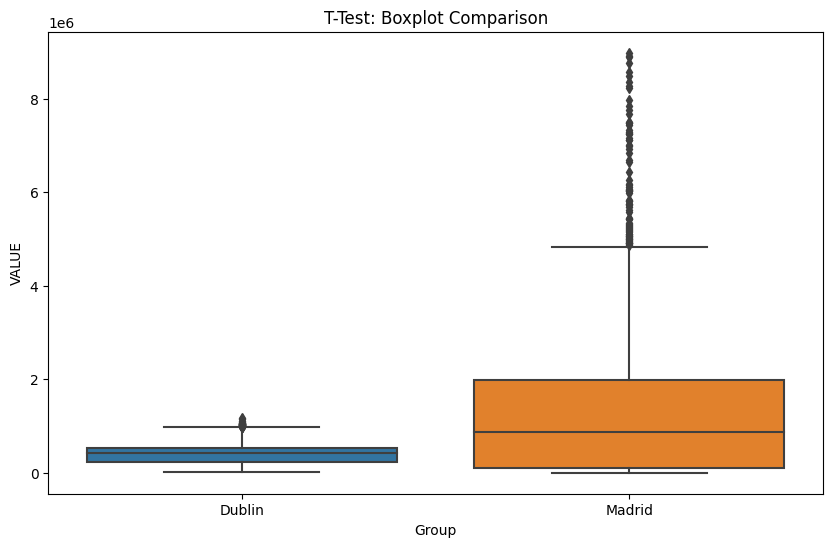

In [42]:
# Boxplot for T-Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='VALUE', data=pd.concat([df.assign(Group='Dublin'), df2.assign(Group='Madrid')]))
plt.title('T-Test: Boxplot Comparison')
plt.show()

To decide whether to accept or reject the null hypothesis based on the t-test result:

Null Hypothesis (H0): The null hypothesis typically assumes that there is no significant difference between the means of the two samples.

Alternative Hypothesis (H1): The alternative hypothesis suggests that there is a significant difference between the means of the two samples.

If the p-value is less than a chosen significance level (commonly 0.05), it provides evidence to reject the null hypothesis.

If the p-value is greater than the significance level, there's insufficient evidence to reject the null hypothesis.


In [55]:
from scipy.stats import mannwhitneyu

result_mannwhitneyu = mannwhitneyu(df['VALUE'], df2['VALUE'])
print("Mann-Whitney U Test Result:", result_mannwhitneyu)

Mann-Whitney U Test Result: MannwhitneyuResult(statistic=688591.5, pvalue=2.0619863389608275e-22)


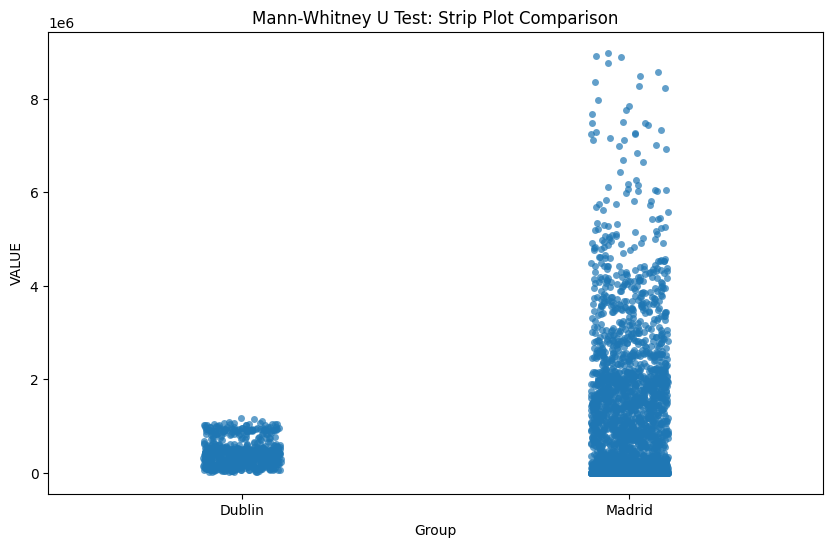

In [44]:
# Example Strip Plot for Mann-Whitney U Test
plt.figure(figsize=(10, 6))
sns.stripplot(x='Group', y='VALUE', data=pd.concat([df.assign(Group='Dublin'), df2.assign(Group='Madrid')]), jitter=True, alpha=0.7)
plt.title('Mann-Whitney U Test: Strip Plot Comparison')
plt.show()

Chi-Square Test:

In [45]:
from scipy.stats import chi2_contingency

# Example chi-square test, replace 'Categorical_Column' with the actual column name
contingency_table = pd.crosstab(df['VALUE'], df2['VALUE'])
result_chi2, _, _, _ = chi2_contingency(contingency_table)
print("Chi-Square Test Result:", result_chi2)

Chi-Square Test Result: 444906.8333333334


In [46]:
from scipy.stats import chi2

contingency_table = pd.crosstab(df['VALUE'], df2['VALUE'])
result_chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Test Result:", result_chi2)
print("P-Value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("The result is statistically significant. There is evidence to reject the null hypothesis.")
else:
    print("The result is not statistically significant. Fail to reject the null hypothesis.")

Chi-Square Test Result: 444906.8333333334
P-Value: 0.16793032078944606
The result is not statistically significant. Fail to reject the null hypothesis.


The p-value resulting from the chi-square test (0.1679) is higher than the commonly chosen significance level of 0.05. As per the conventional significance level:

- If the p-value is less than 0.05,  the null hypothesis is rejected.
- If the p-value is greater than or equal to 0.05, there is a failure to reject the null hypothesis.



ANOVA Test:

In [47]:
from scipy.stats import f_oneway

# Example ANOVA test for Dublin and Madrid cities
result_anova = f_oneway(df['VALUE'], df2['VALUE'])
print("ANOVA Test Result:", result_anova)

ANOVA Test Result: F_onewayResult(statistic=256.2991945836064, pvalue=1.5780324213592069e-55)


ANOVA Test Result: F_onewayResult(statistic=256.2991945836064, pvalue=1.5780324213592069e-55)


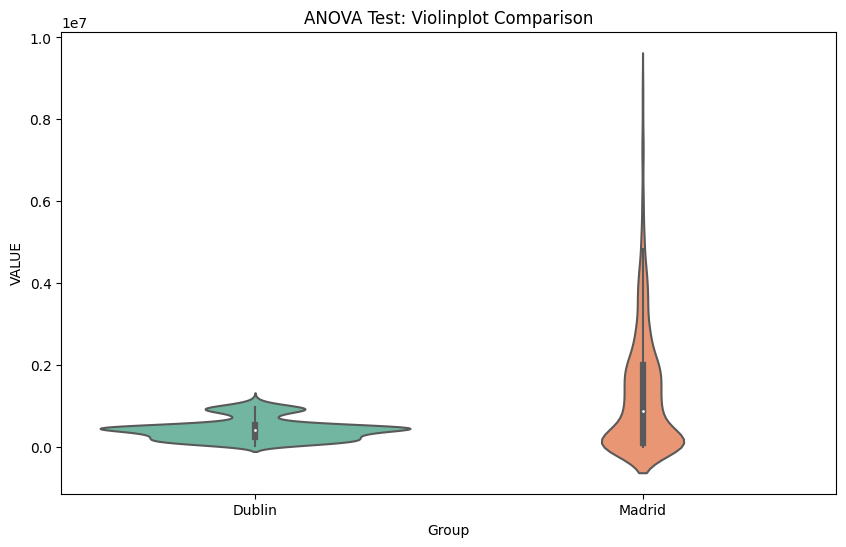

In [48]:

from scipy.stats import f_oneway

# Concatenate the datasets
concatenated_df = pd.concat([df.assign(Group='Dublin'), df2.assign(Group='Madrid')])

# Example ANOVA test, replace 'Column_Name' with the actual column name
result_anova = f_oneway(concatenated_df['VALUE'][concatenated_df['Group'] == 'Dublin'],
                        concatenated_df['VALUE'][concatenated_df['Group'] == 'Madrid'])

print("ANOVA Test Result:", result_anova)

# Plot a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='VALUE', data=concatenated_df, palette="Set2")
plt.title('ANOVA Test: Violinplot Comparison')
plt.show()

The obtained p-value from the ANOVA test (1.578e-55) is extremely small, much smaller than the commonly chosen significance level of 0.05. As per the standard interpretation:


In this instance, the p-value (1.578e-55) is significantly smaller than 0.05. Therefore, the null hypothesis would be rejected. This suggests that there are statistically significant differences among the groups (Dublin and Madrid) concerning the 'VALUE' variable.


Wilcoxon Test:

In [49]:
# Filter Dublin City dataset to include only the common years
df_filtered = df[df['Year'].isin(df2['Year'])]

# Filter Madrid City dataset to include only the common years
df1_filtered = df2[df2['Year'].isin(df['Year'])]

In [50]:

# Filter Dublin City dataset to include only the first 20 rows
df_filtered = df.head(20)

# Filter Madrid City dataset to include only the first 20 rows
df1_filtered = df2.head(20)

In [51]:
df_filtered

,Year,Luas Line,Weeks of the year,VALUE
0,2019,All Luas lines,1,549533.0
1,2019,All Luas lines,2,839022.0
2,2019,All Luas lines,3,819359.0
3,2019,All Luas lines,4,860745.0
4,2019,All Luas lines,5,912795.0
5,2019,All Luas lines,6,912612.0
6,2019,All Luas lines,7,940476.0
7,2019,All Luas lines,8,952291.0
8,2019,All Luas lines,9,929391.0
9,2019,All Luas lines,10,941919.0


In [52]:
df1_filtered

,Código,Etiqueta,Denominación,Year,VALUE
0,1,1,PLAZA DE CRISTO REY - PROSPERIDAD,2014,2503450
1,2,2,PLAZA DE MANUEL BECERRA - AVENIDA REINA VICTORIA,2014,3764122
2,3,3,PUERTA DE TOLEDO - PLAZA DE SAN AMARO,2014,3065657
3,4,4,PLAZA DE CIUDAD LINEAL - PUERTA DE ARGANDA,2014,2457707
4,5,5,PUERTA DEL SOL/SEVILLA - ESTACION DE CHAMARTIN,2014,1974948
5,6,6,PLAZA DE JACINTO BENAVENTE - ORCASITAS,2014,4822674
6,7,7,PLAZA DE ALONSO MARTINEZ - MANOTERAS,2014,1522666
7,8,8,PLAZA DE LEGAZPI - VALDEBERNARDO,2014,2487719
8,9,9,PUERTA DEL SOL/SEVILLA - HORTALEZA,2014,4100366
9,10,10,PLAZA DE CIBELES - PALOMERAS,2014,4657522


In [53]:
from scipy.stats import wilcoxon

# Example Wilcoxon test
result_wilcoxon = wilcoxon(df_filtered['VALUE'], df1_filtered['VALUE'])
print("Wilcoxon Signed-Rank Test Result:", result_wilcoxon)

Wilcoxon Signed-Rank Test Result: WilcoxonResult(statistic=0.0, pvalue=1.9073486328125e-06)


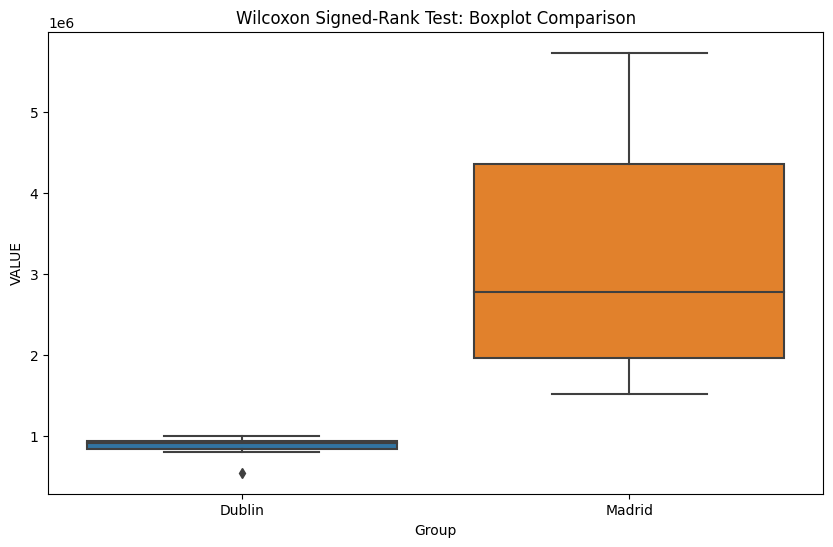

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example Boxplot for Wilcoxon Test
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='VALUE', data=pd.concat([df_filtered.assign(Group='Dublin'), df1_filtered.assign(Group='Madrid')]))
plt.title('Wilcoxon Signed-Rank Test: Boxplot Comparison')
plt.show()